In [1]:
%run transcribe_f0.py

Using TensorFlow backend.


In [2]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pypianoroll
from IPython.display import Audio
from IPython.display import display

In [17]:
fns = glob.glob('./Melodyne Midi/*Vocals.mp3')
fn = fns[0]

In [20]:
sal = run(fn)

Computing HCQT...


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Predicting output...
Computing salience...
0 / 24
1 / 24
2 / 24
3 / 24
4 / 24
5 / 24
6 / 24
7 / 24
8 / 24
9 / 24
10 / 24
11 / 24
12 / 24
13 / 24
14 / 24
15 / 24
16 / 24
17 / 24
18 / 24
19 / 24
20 / 24
21 / 24
22 / 24
23 / 24


Computing HCQT...


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Predicting output...
Computing salience...
0 / 24
1 / 24
2 / 24
3 / 24
4 / 24
5 / 24
6 / 24
7 / 24
8 / 24
9 / 24
10 / 24
11 / 24
12 / 24
13 / 24
14 / 24
15 / 24
16 / 24
17 / 24
18 / 24
19 / 24
20 / 24
21 / 24
22 / 24
23 / 24


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Song: ./Melodyne Midi/(You Want To) Make a Memory Bon Jovi Vocals.mp3
Times: 69 - 83


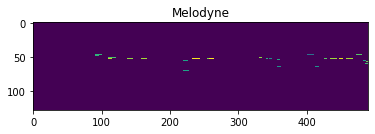

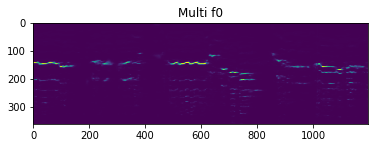

Song: ./Melodyne Midi/(You Want To) Make a Memory Bon Jovi Vocals.mp3
Times: 166 - 180


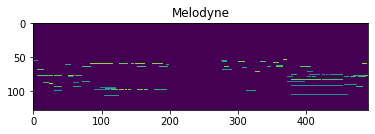

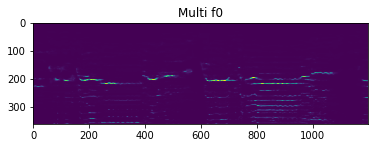

Song: ./Melodyne Midi/(You Want To) Make a Memory Bon Jovi Vocals.mp3
Times: 222 - 236


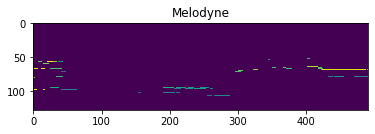

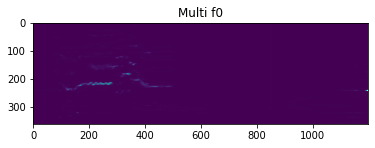

Computing HCQT...


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Predicting output...
Computing salience...
0 / 18
1 / 18
2 / 18
3 / 18
4 / 18
5 / 18
6 / 18
7 / 18
8 / 18
9 / 18
10 / 18
11 / 18
12 / 18
13 / 18
14 / 18
15 / 18
16 / 18
17 / 18


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Song: ./Melodyne Midi/#Beautiful (feat. Miguel) Mariah Carey Vocals.mp3
Times: 50 - 60


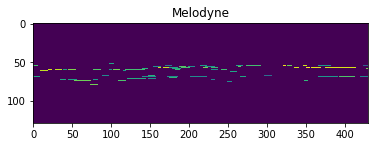

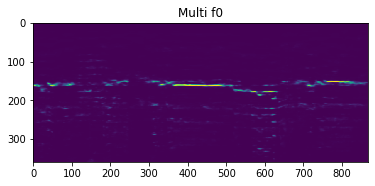

Song: ./Melodyne Midi/#Beautiful (feat. Miguel) Mariah Carey Vocals.mp3
Times: 120 - 130


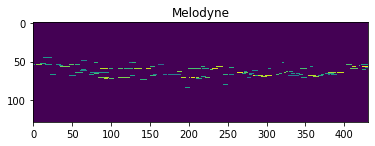

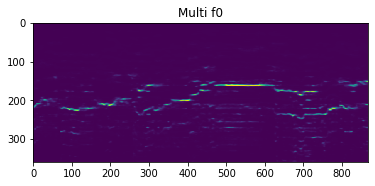

Song: ./Melodyne Midi/#Beautiful (feat. Miguel) Mariah Carey Vocals.mp3
Times: 161 - 171


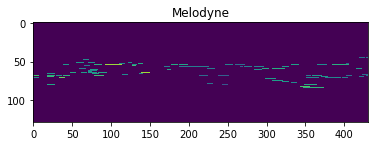

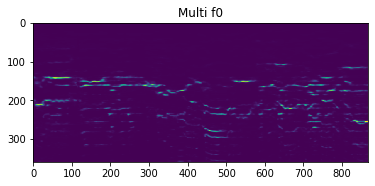

Computing HCQT...


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Predicting output...
Computing salience...
0 / 18
1 / 18
2 / 18
3 / 18
4 / 18
5 / 18
6 / 18
7 / 18
8 / 18
9 / 18
10 / 18
11 / 18
12 / 18
13 / 18
14 / 18
15 / 18
16 / 18
17 / 18


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Song: ./Melodyne Midi/Ready For It Taylor Swift Vocals.mp3
Times: 52 - 62


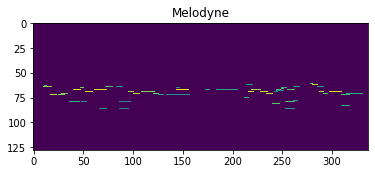

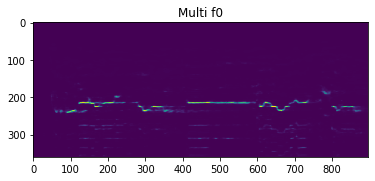

Song: ./Melodyne Midi/Ready For It Taylor Swift Vocals.mp3
Times: 124 - 135


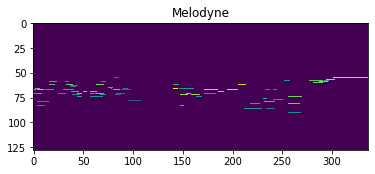

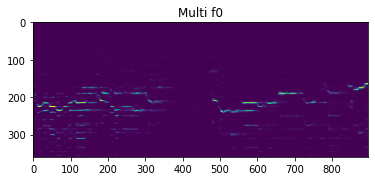

Song: ./Melodyne Midi/Ready For It Taylor Swift Vocals.mp3
Times: 166 - 176


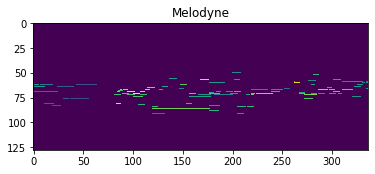

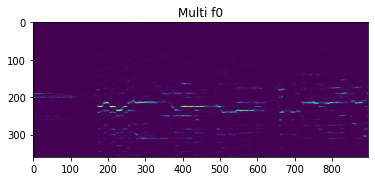

In [3]:
fns = glob.glob('./Melodyne Midi/*Vocals.mp3')
for fn in fns:
    sal = run(fn)
    
    freq_grid = librosa.cqt_frequencies(BINS_PER_OCTAVE*N_OCTAVES, FMIN, bins_per_octave=BINS_PER_OCTAVE)
    time_grid = librosa.core.frames_to_time(range(sal['multif0'].shape[-1]), sr=SR, hop_length=HOP_LENGTH)
    
    pianoroll = pypianoroll.parse(fn[:-4]+' Polyphonic.mid', beat_resolution=24, name='unknown')
    len_piano = pianoroll.tracks[0].pianoroll.shape[0]
    
    y, sr = librosa.load(fn)
    
    for percent in [[0.25, 0.30], [0.6, 0.65], [0.8, 0.85]]:

        print('Song:', fn)
        print('Times:', int(percent[0]*y.size/sr), '-', int(percent[1]*y.size/sr))
        display(Audio(y[int(percent[0]*y.size):int(percent[1]*y.size)], rate=sr))

        plt.imshow(pianoroll.tracks[0].pianoroll[int(percent[0]*len_piano):int(percent[1]*len_piano)].T)
        plt.title('Melodyne')
        plt.show()

        plt.imshow(sal['multif0'][:, int(percent[0]*sal['multif0'].shape[1]):int(percent[1]*sal['multif0'].shape[1])])
        plt.title('Multi f0')
        plt.show()

        """
        plt.imshow(sal['vocal'][:, int(percent[0]*sal['vocal'].shape[1]):int(percent[1]*sal['vocal'].shape[1])])
        plt.title('Vocals')
        plt.show()

        plt.imshow(sal['melody'][:, int(percent[0]*sal['melody'].shape[1]):int(percent[1]*sal['melody'].shape[1])])
        plt.title('Melody')
        plt.show()"""

In [3]:
model = load_model(full_model=False)

In [7]:
import time
from tqdm import tqdm_notebook

In [8]:
fns = glob.glob('./Melodyne Midi/*Vocals.mp3')
for fn in tqdm_notebook(fns):
    hcqt = interp_hcqt(fn, return_grid=False)
    output_dict = compute_output(hcqt, None, None, max_frames=None, full_model=False, model=model)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Computing salience...
0 / 24
1 / 24
2 / 24
3 / 24
4 / 24
5 / 24
6 / 24
7 / 24
8 / 24
9 / 24
10 / 24
11 / 24
12 / 24
13 / 24
14 / 24
15 / 24
16 / 24
17 / 24
18 / 24
19 / 24
20 / 24
21 / 24
22 / 24
23 / 24


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Computing salience...
0 / 18
1 / 18
2 / 18
3 / 18
4 / 18
5 / 18
6 / 18
7 / 18
8 / 18
9 / 18
10 / 18
11 / 18
12 / 18
13 / 18
14 / 18
15 / 18
16 / 18
17 / 18


/home/ubuntu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Computing salience...
0 / 18
1 / 18
2 / 18
3 / 18
4 / 18
5 / 18
6 / 18
7 / 18
8 / 18
9 / 18
10 / 18
11 / 18
12 / 18
13 / 18
14 / 18
15 / 18
16 / 18
17 / 18

